### Import necessary packages

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Data for Deloitte Money League

#### Change league names to align with other data frames

In [215]:
Money_League_Df = pd.read_csv('..\\Consolidated Data\\Deloitte_Money_League Consildation.csv',usecols=['Country','Number of Teams'])
Money_League_Df.columns=['League','Deloitte_Club_Count']
Money_League_Df=Money_League_Df.replace(Money_League_Df.iloc[3]['League'],'Bundesliga') 

### Import data for most valuable players.

#### Change league names to align with other data frames

In [216]:
Top_Player_Df = pd.read_csv('..\\Consolidated Data\\Top 50 Players Consildation.csv')
Top_Player_Df.columns=['League','Top_Player_Count']
Top_Player_Df=Top_Player_Df.replace(Top_Player_Df.iloc[1]['League'],'English Premier League')
Top_Player_Df=Top_Player_Df.replace(Top_Player_Df.iloc[2]['League'],'La Liga')
Top_Player_Df=Top_Player_Df.replace(Top_Player_Df.iloc[3]['League'],'Serie A')

### Import Player counts from the world-cup

#### Change league names to align with other data frames

In [217]:
World_Cup_Df = pd.read_csv('..\\Consolidated Data\\World Cup Data Consolidation.csv')
World_Cup_Df.columns=['League','WC_Player_Count']
World_Cup_Df=World_Cup_Df.replace(World_Cup_Df.iloc[32]['League'],'English Premier League')
World_Cup_Df=World_Cup_Df.replace(World_Cup_Df.iloc[41]['League'],'Super Lig')

### Import Champions League data

#### Change league names to align with other data frames

In [218]:
Champions_League_Df = pd.read_csv('..\\Consolidated Data\\Champions League Data Consildation.csv')
Champions_League_Df.columns=['League','CL_Range1_Win','CL_Range2_Win','CL_Range3_Win','CL_Range4_Win','CL_Range5_Win','CL_Range1_Runners','CL_Range2_Runners','CL_Range3_Runners','CL_Range4_Runners','CL_Range5_Runners','CL_Range1_SF1','CL_Range2_SF1','CL_Range3_SF1','CL_Range4_SF1','CL_Range5_SF1','CL_Range1_SF2','CL_Range2_SF2','CL_Range3_SF2','CL_Range4_SF2','CL_Range5_SF2']
Champions_League_Df=Champions_League_Df.replace(Champions_League_Df.iloc[18]['League'],'English Premier League')
Champions_League_Df=Champions_League_Df.replace(Champions_League_Df.iloc[28]['League'],'Super Lig')

### Import Europa League data

#### Change league names to align with other data frames

In [219]:
Europa_League_Df = pd.read_csv('..\\Consolidated Data\\Europa League Data Consildation.csv')
Europa_League_Df.columns=['League','EL_Range1_Win','EL_Range2_Win','EL_Range3_Win','EL_Range4_Win','EL_Range5_Win','EL_Range1_Runners','EL_Range2_Runners','EL_Range3_Runners','EL_Range4_Runners','EL_Range5_Runners','EL_Range1_SF1','EL_Range2_SF1','EL_Range3_SF1','EL_Range4_SF1','EL_Range5_SF1','EL_Range1_SF2','EL_Range2_SF2','EL_Range3_SF2','EL_Range4_SF2','EL_Range5_SF2']
Europa_League_Df=Europa_League_Df.replace(Europa_League_Df.iloc[18]['League'],'English Premier League')
Europa_League_Df=Europa_League_Df.replace(Europa_League_Df.iloc[30]['League'],'Super Lig')

### Combine all data-frames to form the data frame to begin clustering on

In [220]:
Combined_DF = pd.merge(Money_League_Df,Top_Player_Df,how='outer',on='League')
Combined_DF = pd.merge(Combined_DF,World_Cup_Df,how='outer',on='League')
Combined_DF = pd.merge(Combined_DF,Europa_League_Df,how='outer',on='League')
Combined_DF = pd.merge(Combined_DF,Champions_League_Df,how='outer',on='League')

### Clean-up the data frame to remove null values and set the index

In [221]:
Combined_DF = Combined_DF.dropna(how='all')
Combined_DF = Combined_DF.fillna(0)
Combined_DF = Combined_DF.set_index(keys='League')

### Remove non european leagues and other low value leagues

In [222]:
Combined_DF = Combined_DF.drop(['2. Bundesliga','A-League','Argentine Primera División','Campeonato Brasileiro Série A','Categoría Primera A','Chinese Super League','EFL League One','Egyptian Premier League','Ekstraklasa','Israeli Premier League','J1 League'],axis=0)
Combined_DF = Combined_DF.drop(['J2 League','K League 1','Liga FPD','Liga I','Liga MX','Ligue 2','Ligue1, LP1','Major League Soccer','Nigerian Professional Football League','Persian Gulf Pro League'],axis=0)
Combined_DF = Combined_DF.drop(['Segunda División','Úrvalsdeild karla (football)','Championnat National 2','Regionalliga Nordost','Ukrainian Amateur Football Championship','Fortuna liga','Nemzeti Bajnokság II'],axis=0)

### Extract the 3 columns and normalize them seperately

In [223]:
Combined_DF_norm = Combined_DF[['Deloitte_Club_Count','Top_Player_Count','WC_Player_Count']]
Combined_DF_norm=((Combined_DF_norm-Combined_DF_norm.min())/(Combined_DF_norm.max()-Combined_DF_norm.min()))*3

### Once normalized, create a temp data frame to merge back normalized data set with the other columns

In [224]:
Combined_DF_temp = Combined_DF.drop(['Deloitte_Club_Count','Top_Player_Count','WC_Player_Count'],axis=1)

In [225]:
Combined_DF_norm = Combined_DF_norm.reset_index()

In [226]:
Combined_DF_temp = Combined_DF_temp.reset_index()

In [227]:
Combined_DF_temp2 = pd.merge(Combined_DF_norm,Combined_DF_temp,how='inner',on='League')

In [228]:
Combined_DF_temp = Combined_DF_temp2.set_index('League')

### Apply weightage

In [229]:
el_weight = 0.5
cl_weight = 1
winner_wt = 1
runner_wt = 0.8
sf_wt = 0.5
range1_wt = 1
range2_wt = 0.9
range3_wt = 0.8
range4_wt = 0.7
range5_wt = 0.6

In [230]:
Combined_DF_temp['CL_Range1_Runners'] = Combined_DF_temp['CL_Range1_Runners'] * cl_weight * range1_wt * runner_wt * 1
Combined_DF_temp['CL_Range1_SF1'] = Combined_DF_temp['CL_Range1_SF1'] * cl_weight * range1_wt * sf_wt * 1
Combined_DF_temp['CL_Range1_SF2'] = Combined_DF_temp['CL_Range1_SF2'] * cl_weight * range1_wt * sf_wt * 1
Combined_DF_temp['CL_Range1_Win'] = Combined_DF_temp['CL_Range1_Win'] * cl_weight * range1_wt * winner_wt * 1
Combined_DF_temp['CL_Range2_Runners'] = Combined_DF_temp['CL_Range2_Runners'] * cl_weight * range2_wt * runner_wt * 1
Combined_DF_temp['CL_Range2_SF1'] = Combined_DF_temp['CL_Range2_SF1'] * cl_weight * range2_wt * sf_wt * 1
Combined_DF_temp['CL_Range2_SF2'] = Combined_DF_temp['CL_Range2_SF2'] * cl_weight * range2_wt * sf_wt * 1
Combined_DF_temp['CL_Range2_Win'] = Combined_DF_temp['CL_Range2_Win'] * cl_weight * range2_wt * winner_wt * 1
Combined_DF_temp['CL_Range3_Runners'] = Combined_DF_temp['CL_Range3_Runners'] * cl_weight * range3_wt * runner_wt * 1
Combined_DF_temp['CL_Range3_SF1'] = Combined_DF_temp['CL_Range3_SF1'] * cl_weight * range3_wt * sf_wt * 1
Combined_DF_temp['CL_Range3_SF2'] = Combined_DF_temp['CL_Range3_SF2'] * cl_weight * range3_wt * sf_wt * 1
Combined_DF_temp['CL_Range3_Win'] = Combined_DF_temp['CL_Range3_Win'] * cl_weight * range3_wt * winner_wt * 1
Combined_DF_temp['CL_Range4_Runners'] = Combined_DF_temp['CL_Range4_Runners'] * cl_weight * range4_wt * runner_wt * 1
Combined_DF_temp['CL_Range4_SF1'] = Combined_DF_temp['CL_Range4_SF1'] * cl_weight * range4_wt * sf_wt * 1
Combined_DF_temp['CL_Range4_SF2'] = Combined_DF_temp['CL_Range4_SF2'] * cl_weight * range4_wt * sf_wt * 1
Combined_DF_temp['CL_Range4_Win'] = Combined_DF_temp['CL_Range4_Win'] * cl_weight * range4_wt * winner_wt * 1
Combined_DF_temp['CL_Range5_Runners'] = Combined_DF_temp['CL_Range5_Runners'] * cl_weight * range5_wt * runner_wt * 1
Combined_DF_temp['CL_Range5_SF1'] = Combined_DF_temp['CL_Range5_SF1'] * cl_weight * range5_wt * sf_wt * 1
Combined_DF_temp['CL_Range5_SF2'] = Combined_DF_temp['CL_Range5_SF2'] * cl_weight * range5_wt * sf_wt * 1
Combined_DF_temp['CL_Range5_Win'] = Combined_DF_temp['CL_Range5_Win'] * cl_weight * range5_wt * winner_wt * 1
Combined_DF_temp['Deloitte_Club_Count'] = Combined_DF_temp['Deloitte_Club_Count'] * 1 * 1 * 1 * 0.8
Combined_DF_temp['EL_Range1_Runners'] = Combined_DF_temp['EL_Range1_Runners'] * el_weight * range1_wt * runner_wt * 1
Combined_DF_temp['EL_Range1_SF1'] = Combined_DF_temp['EL_Range1_SF1'] * el_weight * range1_wt * sf_wt * 1
Combined_DF_temp['EL_Range1_SF2'] = Combined_DF_temp['EL_Range1_SF2'] * el_weight * range1_wt * sf_wt * 1
Combined_DF_temp['EL_Range1_Win'] = Combined_DF_temp['EL_Range1_Win'] * el_weight * range1_wt * winner_wt * 1
Combined_DF_temp['EL_Range2_Runners'] = Combined_DF_temp['EL_Range2_Runners'] * el_weight * range2_wt * runner_wt * 1
Combined_DF_temp['EL_Range2_SF1'] = Combined_DF_temp['EL_Range2_SF1'] * el_weight * range2_wt * sf_wt * 1
Combined_DF_temp['EL_Range2_SF2'] = Combined_DF_temp['EL_Range2_SF2'] * el_weight * range2_wt * sf_wt * 1
Combined_DF_temp['EL_Range2_Win'] = Combined_DF_temp['EL_Range2_Win'] * el_weight * range2_wt * winner_wt * 1
Combined_DF_temp['EL_Range3_Runners'] = Combined_DF_temp['EL_Range3_Runners'] * el_weight * range3_wt * runner_wt * 1
Combined_DF_temp['EL_Range3_SF1'] = Combined_DF_temp['EL_Range3_SF1'] * el_weight * range3_wt * sf_wt * 1
Combined_DF_temp['EL_Range3_SF2'] = Combined_DF_temp['EL_Range3_SF2'] * el_weight * range3_wt * sf_wt * 1
Combined_DF_temp['EL_Range3_Win'] = Combined_DF_temp['EL_Range3_Win'] * el_weight * range3_wt * winner_wt * 1
Combined_DF_temp['EL_Range4_Runners'] = Combined_DF_temp['EL_Range4_Runners'] * el_weight * range4_wt * runner_wt * 1
Combined_DF_temp['EL_Range4_SF1'] = Combined_DF_temp['EL_Range4_SF1'] * el_weight * range4_wt * sf_wt * 1
Combined_DF_temp['EL_Range4_SF2'] = Combined_DF_temp['EL_Range4_SF2'] * el_weight * range4_wt * sf_wt * 1
Combined_DF_temp['EL_Range4_Win'] = Combined_DF_temp['EL_Range4_Win'] * el_weight * range4_wt * winner_wt * 1
Combined_DF_temp['EL_Range5_Runners'] = Combined_DF_temp['EL_Range5_Runners'] * el_weight * range5_wt * runner_wt * 1
Combined_DF_temp['EL_Range5_SF1'] = Combined_DF_temp['EL_Range5_SF1'] * el_weight * range5_wt * sf_wt * 1
Combined_DF_temp['EL_Range5_SF2'] = Combined_DF_temp['EL_Range5_SF2'] * el_weight * range5_wt * sf_wt * 1
Combined_DF_temp['EL_Range5_Win'] = Combined_DF_temp['EL_Range5_Win'] * el_weight * range5_wt * winner_wt * 1
Combined_DF_temp['Top_Player_Count'] = Combined_DF_temp['Top_Player_Count'] * 1 * 1 * 1 * 1
Combined_DF_temp['WC_Player_Count'] = Combined_DF_temp['WC_Player_Count'] * 1 * 1 * 1 * 0.6

### Hierarchial Clustering

In [231]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(Combined_DF_temp.values, 'ward')
Z2 = linkage(Combined_DF_temp.values, 'centroid')

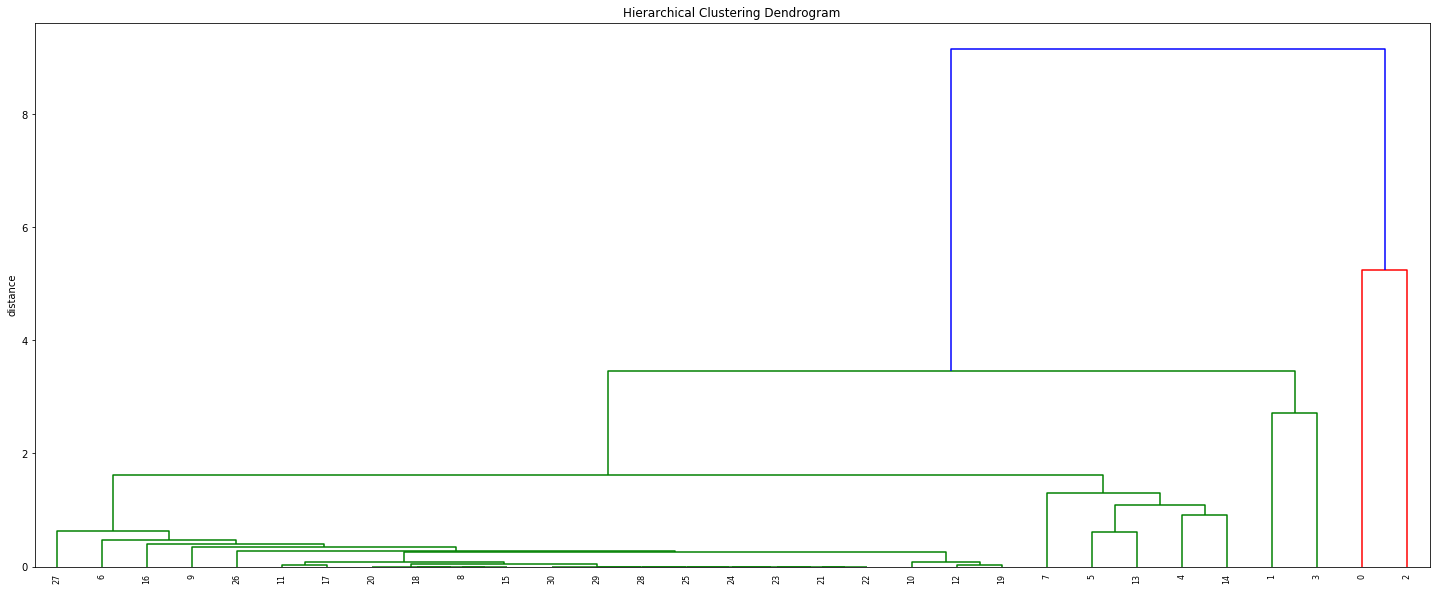

In [232]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### Remove The first cluster and run the clustering again

In [233]:
Combined_DF_temp_run2 = Combined_DF_temp.drop(['English Premier League','La Liga'],axis=0)

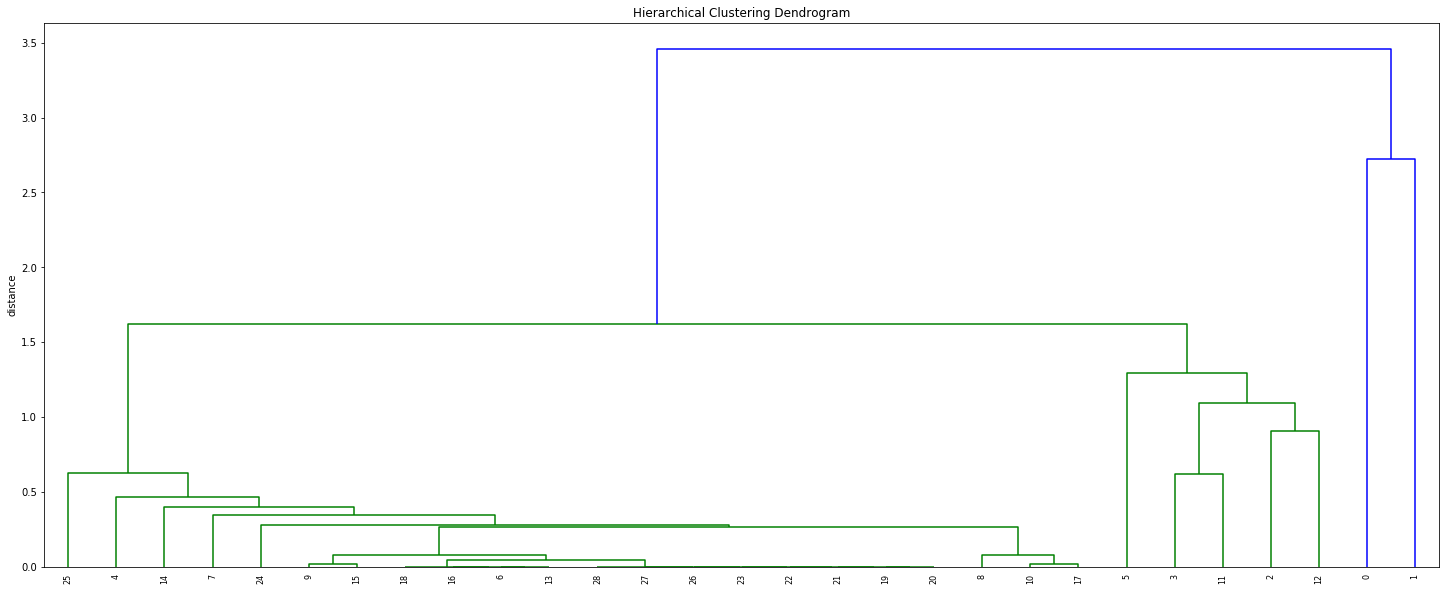

In [234]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(Combined_DF_temp_run2.values, 'ward')
Z2 = linkage(Combined_DF_temp_run2.values, 'centroid')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### Remove The second cluster and run the clustering again

In [235]:
Combined_DF_temp_run3 = Combined_DF_temp_run2.drop(['Serie A','Bundesliga'],axis=0)

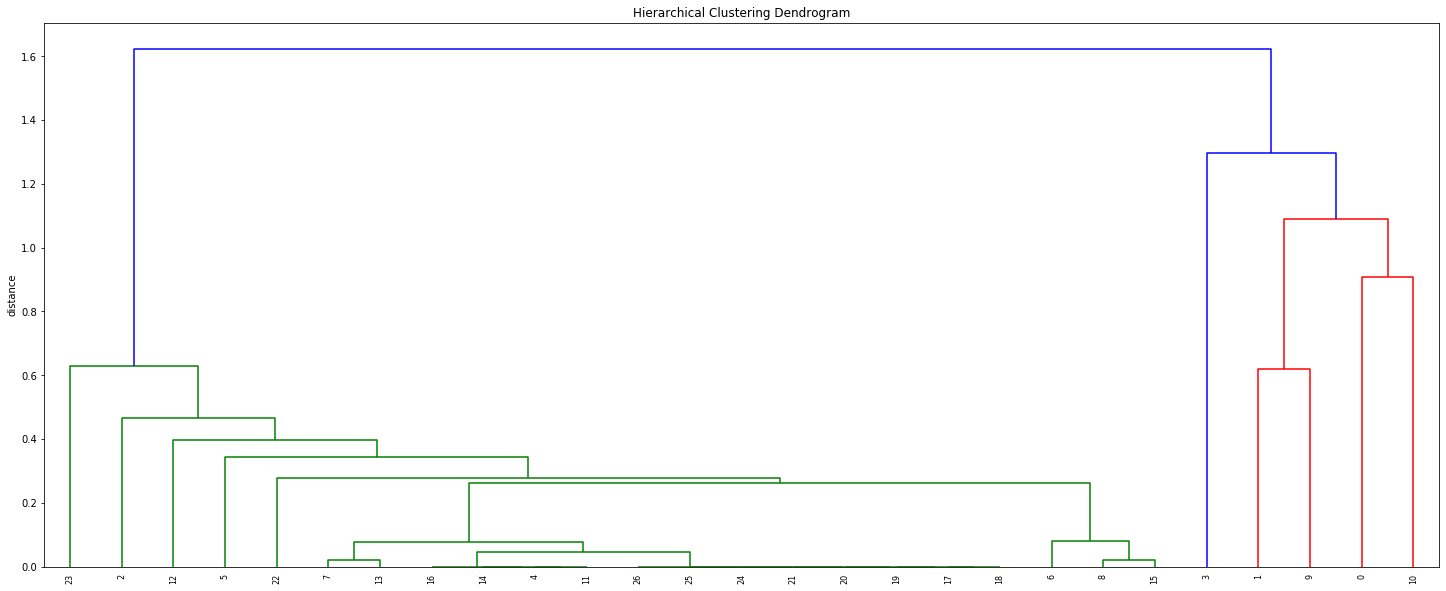

In [236]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(Combined_DF_temp_run3.values, 'ward')
Z2 = linkage(Combined_DF_temp_run3.values, 'centroid')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

### Start building the final data frame and assign tiers accordingly

In [237]:
Combined_Df = Combined_DF_temp.iloc[[0,2]]

In [238]:
Combined_Df['Tier'] = np.nan

c:\users\akhil_s_bhat\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [239]:
Combined_Df.loc['English Premier League']['Tier'] = 1
Combined_Df.loc['La Liga']['Tier'] = 1

In [240]:
Combined_Df = Combined_Df.append(Combined_DF_temp_run2.iloc[[0,1]])

In [241]:
Combined_Df.loc['Serie A']['Tier'] = 2
Combined_Df.loc['Bundesliga']['Tier'] = 2

In [242]:
Combined_Df = Combined_Df.append(Combined_DF_temp_run3.iloc[[0,10]])

In [243]:
Combined_Df.loc['Ligue 1']['Tier'] = 3
Combined_Df.loc['Eredivisie']['Tier'] = 3

In [244]:
Combined_Df['Tier']

League
English Premier League    1.0
La Liga                   1.0
Serie A                   2.0
Bundesliga                2.0
Ligue 1                   3.0
Eredivisie                3.0
Name: Tier, dtype: float64

### Saving the final data

In [245]:
League_Ranking_DF = Combined_Df.reset_index()

In [246]:
League_Tier_DF = League_Ranking_DF[['League','Tier']]

In [247]:
League_Tier_DF

,League,Tier
0,English Premier League,1.0
1,La Liga,1.0
2,Serie A,2.0
3,Bundesliga,2.0
4,Ligue 1,3.0
5,Eredivisie,3.0
